# K-means clustering: using "sklearn" and sythetic data

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/Sistemas/4to_semestre/semanaTec/TC1002S/NotebooksProfessor"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [ ]:
# Dataset url
url = Ruta + "/datasets/iris/iris.csv"

# Load the dataset
df  = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print the dataframe
df

,Ms_1,Ms_2,Ms_3,Ms_4,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# get the number of observations and variables
df.shape


(150, 5)

2. Drop rows with any missing values


In [ ]:
# Drop rows with NaN values if existing
df.dropna()

# Print the new shape
print(df.shape)

(150, 5)


3. Scatterplot




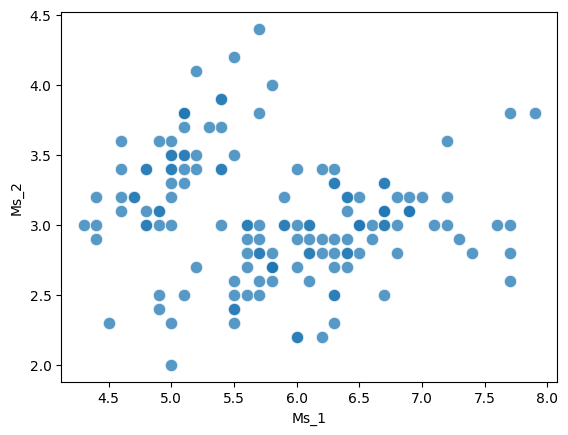

In [ ]:
# Scatterplot of x1 and x2
sns.scatterplot(data=df, x="Ms_1", y="Ms_2", s=80, alpha=0.75)
plt.show()

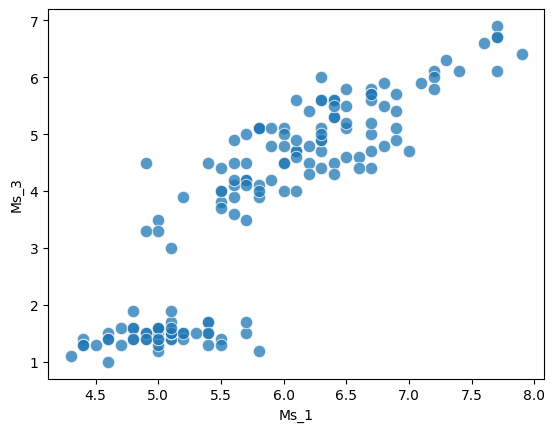

In [ ]:
# Scatterplot of x1 and x3
sns.scatterplot(data=df, x="Ms_1", y="Ms_3", s=80, alpha=0.75)
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

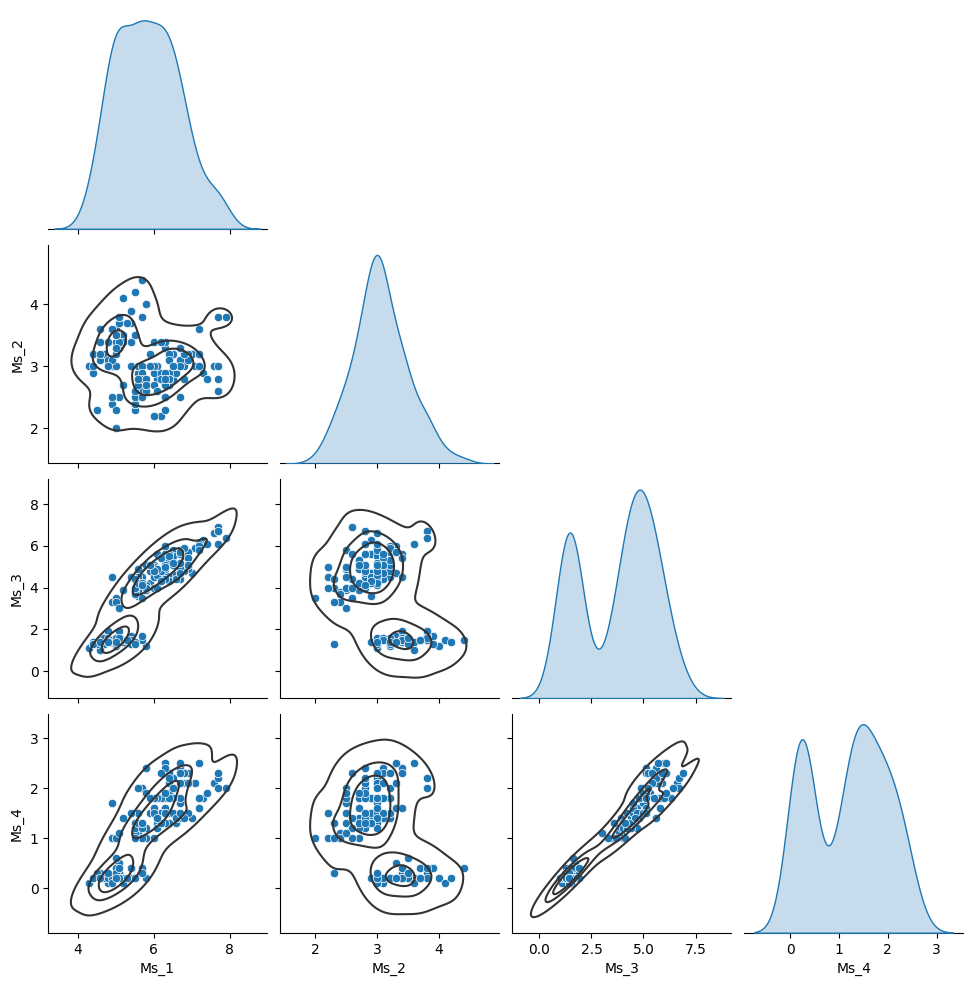

In [ ]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [ ]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(df[['Ms_1','Ms_2', 'Ms_3', 'Ms_4']])
#yestimated = km.fit_predict(df[['Ms_1', 'Ms_3']] )
#yestimated = km.fit_predict(df[['Ms_1','Ms_4']] )
#yestimated = km.fit_predict(df[['Ms_2','Ms_3']] )
#yestimated = km.fit_predict(df[['Ms_2','Ms_4']] )
#yestimated = km.fit_predict(df[['Ms_3','Ms_4']] )

# Print estimated cluster of each point in the dataset
yestimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

df

,Ms_1,Ms_2,Ms_3,Ms_4,Type,yestimated
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
# Print the Labels/Names of the existing clusters
df.yestimated.unique()

array([1, 2, 0], dtype=int32)

In [ ]:
# Cluster centroides
km.cluster_centers_


array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [ ]:
# Sum of squared error (sse) of the final model
km.inertia_

78.85566582597731

In [ ]:
# The number of iterations required to converge
km.n_iter_

3

# <span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Compute the number of points in each cluster

In [ ]:
# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 2: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 61
Number of points in clusters 1: 50
Number of points in clusters 2: 39
Total Number of points in the clusters: 150


# Plot estimated clusters

Plot estimated clusters

In [ ]:
df.yestimated.unique()


array([1, 2, 0], dtype=int32)

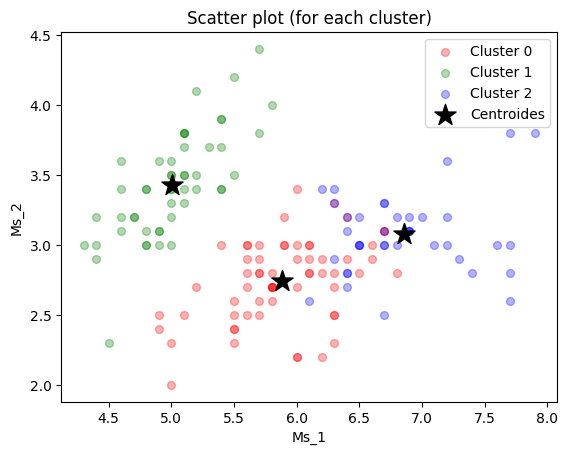

In [ ]:

# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.Ms_1, df1.Ms_2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Ms_1, df2.Ms_2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Ms_1, df3.Ms_2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Ms_1')
plt.ylabel('Ms_2')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [ ]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['Ms_1','Ms_2', 'Ms_3', 'Ms_4']])
    # Save sse for each k
    sse.append(km.inertia_)


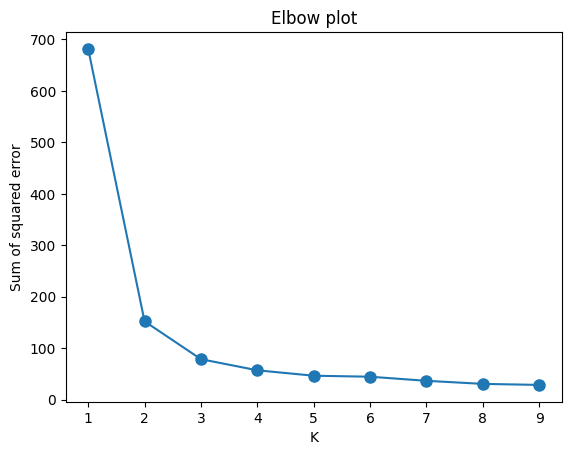

In [ ]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced

**K = 3**

<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity:

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions


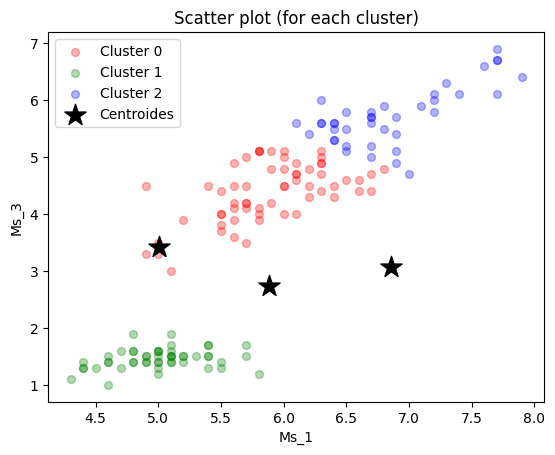

In [ ]:

# Scatter plot of each cluster
plt.scatter(df1.Ms_1, df1.Ms_3, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Ms_1, df2.Ms_3, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Ms_1, df3.Ms_3, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Ms_1')
plt.ylabel('Ms_3')
plt.legend()
plt.show()

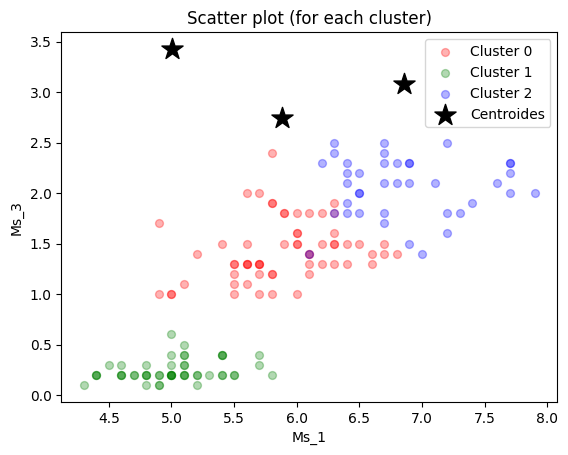

In [ ]:
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]


# Scatter plot of each cluster
plt.scatter(df1.Ms_1, df1.Ms_4, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Ms_1, df2.Ms_4, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Ms_1, df3.Ms_4, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Ms_1')
plt.ylabel('Ms_3')
plt.legend()
plt.show()

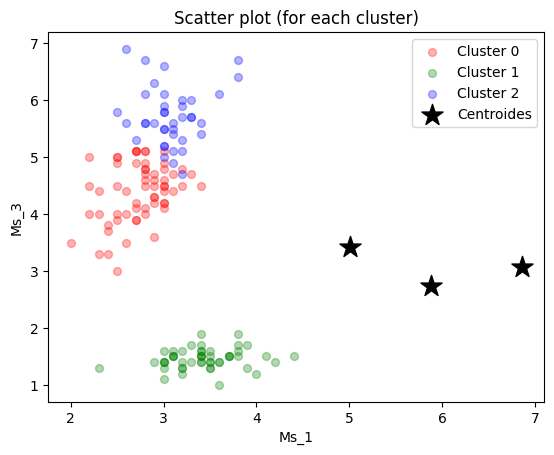

In [ ]:
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]


# Scatter plot of each cluster
plt.scatter(df1.Ms_2, df1.Ms_3, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Ms_2, df2.Ms_3, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Ms_2, df3.Ms_3, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Ms_1')
plt.ylabel('Ms_3')
plt.legend()
plt.show()

Cluster with only two variables (Ms_1, Ms_2)

In [ ]:
km2 = KMeans(n_clusters=K, n_init="auto")

yestimated2 = km2.fit_predict(df[['Ms_1', 'Ms_3']] )

In [ ]:
df['yestimated2'] = yestimated2

df

,Ms_1,Ms_2,Ms_3,Ms_4,Type,yestimated,yestimated2
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [ ]:
df.yestimated2.unique()

array([0, 2, 1], dtype=int32)

In [ ]:
km2.cluster_centers_

array([[5.00784314, 1.49215686],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

In [ ]:
km2.inertia_

53.80997864410693

In [ ]:
km2.n_iter_

5

In [ ]:

newdf0 = df[df.yestimated2==0]
newdf1 = df[df.yestimated2==1]
newdf2 = df[df.yestimated2==2]



# Number of points in cluster 0
newNpointsCluster0 = newdf0.shape[0]
newNpointsCluster1 = newdf1.shape[0]
newNpointsCluster2 = newdf2.shape[0]

# Print
print("Number of points in clusters 0: " + str(newNpointsCluster0) )
print("Number of points in clusters 1: " + str(newNpointsCluster1) )
print("Number of points in clusters 2: " + str(newNpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(newNpointsCluster0+newNpointsCluster1+newNpointsCluster2) )


Number of points in clusters 0: 51
Number of points in clusters 1: 58
Number of points in clusters 2: 41
Total Number of points in the clusters: 150


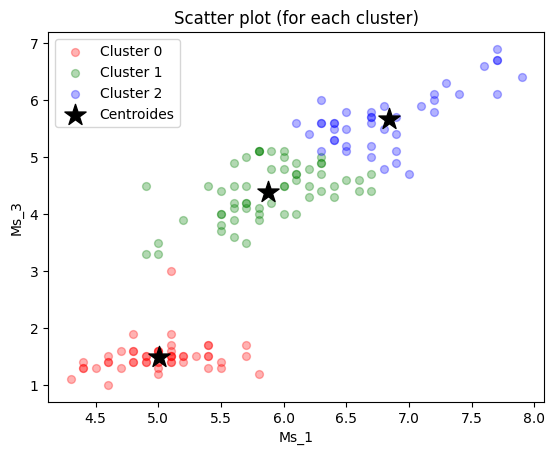

In [ ]:

# Scatter plot of each cluster
plt.scatter(newdf0.Ms_1, newdf0.Ms_3, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(newdf1.Ms_1, newdf1.Ms_3, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(newdf2.Ms_1, newdf2.Ms_3, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Ms_1')
plt.ylabel('Ms_3')
plt.legend()
plt.show()

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features




In [ ]:

# Define number of clusters
K1  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km1 = KMeans(n_clusters=K1, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated1 = km1.fit_predict(df[['Ms_1','Ms_2', 'Ms_3', 'Ms_4']])
#yestimated2 = km.fit_predict(df[['Ms_1', 'Ms_3']] )
#yestimated3 = km.fit_predict(df[['Ms_1','Ms_4']] )
#yestimated4 = km.fit_predict(df[['Ms_2','Ms_3']] )
#yestimated5 = km.fit_predict(df[['Ms_2','Ms_4']] )
#yestimated6 = km.fit_predict(df[['Ms_3','Ms_4']] )

# Print estimated cluster of each point in the dataset
yestimated1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
df['yestimated1'] = yestimated1

df

,Ms_1,Ms_2,Ms_3,Ms_4,Type,yestimated,yestimated2,yestimated1
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0,1,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2,0
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2,0


In [ ]:
df.yestimated1.unique()

array([1, 0, 2], dtype=int32)

In [ ]:
km1.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [ ]:
km1.inertia_

78.85566582597731

In [ ]:
km1.n_iter_

3

In [ ]:
ndf0 = df[df.yestimated1==0]
ndf1 = df[df.yestimated1==1]
ndf2 = df[df.yestimated1==2]

# Number of points in cluster 0
nNpointsCluster0 = ndf0.shape[0]
nNpointsCluster1 = ndf1.shape[0]
nNpointsCluster2 = ndf2.shape[0]

# Print
print("Number of points in clusters 0: " + str(nNpointsCluster0) )
print("Number of points in clusters 1: " + str(nNpointsCluster1) )
print("Number of points in clusters 2: " + str(nNpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(nNpointsCluster0+nNpointsCluster1+nNpointsCluster2) )

Number of points in clusters 0: 39
Number of points in clusters 1: 50
Number of points in clusters 2: 61
Total Number of points in the clusters: 150


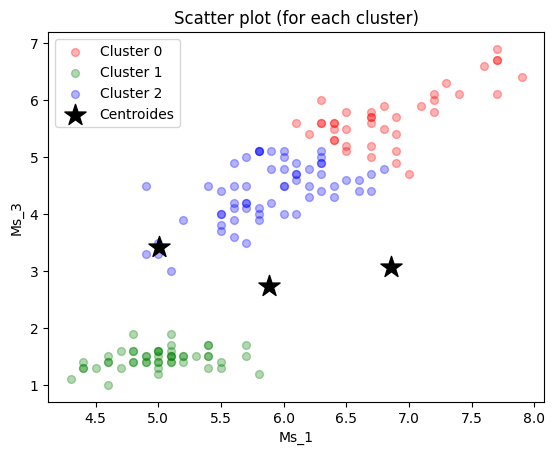

In [ ]:
ndf1 = df[df.yestimated1==0]
ndf2 = df[df.yestimated1==1]
ndf3 = df[df.yestimated1==2]

# Scatter plot of each cluster
plt.scatter(ndf1.Ms_1, ndf1.Ms_3, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(ndf2.Ms_1, ndf2.Ms_3, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(ndf3.Ms_1, ndf3.Ms_3, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Ms_1')
plt.ylabel('Ms_3')
plt.legend()
plt.show()

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features



In [ ]:
km3 = KMeans(n_clusters=K, n_init="auto")

yestimated3 = km3.fit_predict(df[['Ms_3', 'Ms_4']] )

In [ ]:
df['yestimated3'] = yestimated3

df

,Ms_1,Ms_2,Ms_3,Ms_4,Type,yestimated,yestimated2,yestimated1,yestimated3
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,1,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2,0,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,1,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2,0,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2,0,2


In [ ]:
df.yestimated3.unique()

array([1, 0, 2], dtype=int32)

In [ ]:
km3.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [ ]:
km3.inertia_

31.37135897435897

In [ ]:
km3.n_iter_

5

In [ ]:
tdf0 = df[df.yestimated3==0]
tdf1 = df[df.yestimated3==1]
tdf2 = df[df.yestimated3==2]



# Number of points in cluster 0
tNpointsCluster0 = tdf0.shape[0]
tNpointsCluster1 = tdf1.shape[0]
tNpointsCluster2 = tdf2.shape[0]

# Print
print("Number of points in clusters 0: " + str(tNpointsCluster0) )
print("Number of points in clusters 1: " + str(tNpointsCluster1) )
print("Number of points in clusters 2: " + str(tNpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(tNpointsCluster0+tNpointsCluster1+tNpointsCluster2) )


Number of points in clusters 0: 52
Number of points in clusters 1: 50
Number of points in clusters 2: 48
Total Number of points in the clusters: 150


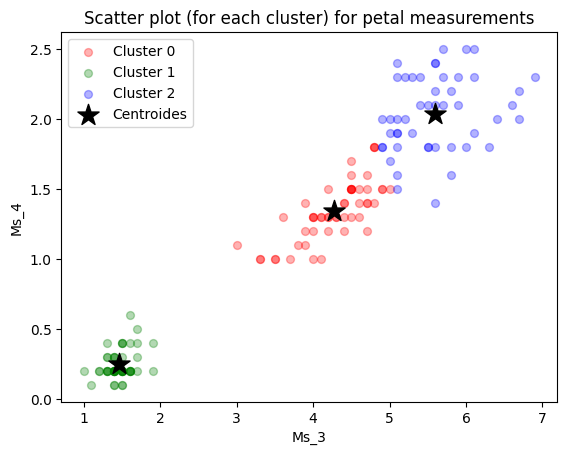

In [ ]:
# Scatter plot of each cluster
plt.scatter(tdf0.Ms_3, tdf0.Ms_4, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(tdf1.Ms_3, tdf1.Ms_4, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(tdf2.Ms_3, tdf2.Ms_4, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster) for petal measurements')
plt.xlabel('Ms_3')
plt.ylabel('Ms_4')
plt.legend()
plt.show()

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features



In [ ]:
km4 = KMeans(n_clusters=K, n_init="auto")

yestimated4 = km4.fit_predict(df[['Ms_1', 'Ms_2']] )

In [ ]:
df['yestimated4'] = yestimated4

df

,Ms_1,Ms_2,Ms_3,Ms_4,Type,yestimated,yestimated2,yestimated1,yestimated3,yestimated4
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,1,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,1,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,1,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,1,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2,0,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,1,2,2,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2,0,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2,0,2,2


In [ ]:
df.yestimated4.unique()

array([0, 2, 1], dtype=int32)

In [ ]:
km4.cluster_centers_

array([[5.006     , 3.428     ],
       [5.77358491, 2.69245283],
       [6.81276596, 3.07446809]])

In [ ]:
km4.inertia_

37.05070212765956

In [ ]:
km4.n_iter_

9

In [ ]:
sdf0 = df[df.yestimated4==0]
sdf1 = df[df.yestimated4==1]
sdf2 = df[df.yestimated4==2]



# Number of points in cluster 0
sNpointsCluster0 = sdf0.shape[0]
sNpointsCluster1 = sdf1.shape[0]
sNpointsCluster2 = sdf2.shape[0]

# Print
print("Number of points in clusters 0: " + str(sNpointsCluster0) )
print("Number of points in clusters 1: " + str(sNpointsCluster1) )
print("Number of points in clusters 2: " + str(sNpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(sNpointsCluster0+sNpointsCluster1+sNpointsCluster2) )

Number of points in clusters 0: 50
Number of points in clusters 1: 53
Number of points in clusters 2: 47
Total Number of points in the clusters: 150


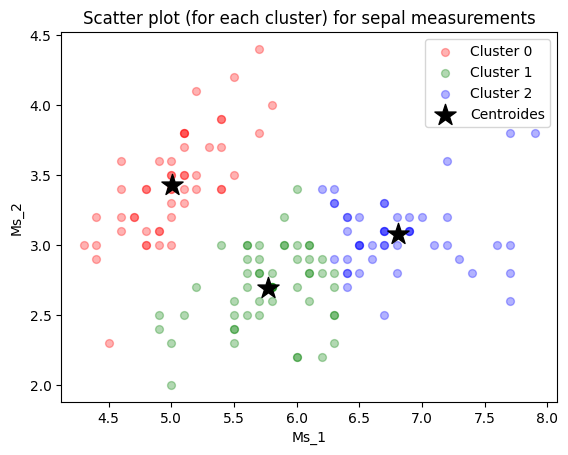

In [ ]:
# Scatter plot of each cluster
plt.scatter(sdf0.Ms_1, sdf0.Ms_2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(sdf1.Ms_1, sdf1.Ms_2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(sdf2.Ms_1, sdf2.Ms_2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster) for sepal measurements')
plt.xlabel('Ms_1')
plt.ylabel('Ms_2')
plt.legend()
plt.show()

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics

We can analyze this by definining the Elbow plot for each one of this grouping methods. One for all four features, and one for each pair (sepal, petal)

In [ ]:
# Intialize a list to hold sum of squared error (sse)
sse_all = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['Ms_1','Ms_2', 'Ms_3', 'Ms_4']])
    # Save sse for each k
    sse_all.append(km.inertia_)

# Intialize a list to hold sum of squared error (sse)
sse_petal = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km3 = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km3.fit_predict(df[['Ms_3', 'Ms_4']])
    # Save sse_petal for each k
    sse_petal.append(km3.inertia_)

# Intialize a list to hold sum of squared error (sse)
sse_sepal = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km4 = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km4.fit_predict(df[['Ms_1', 'Ms_2']])
    # Save sse_sepal for each k
    sse_sepal.append(km4.inertia_)

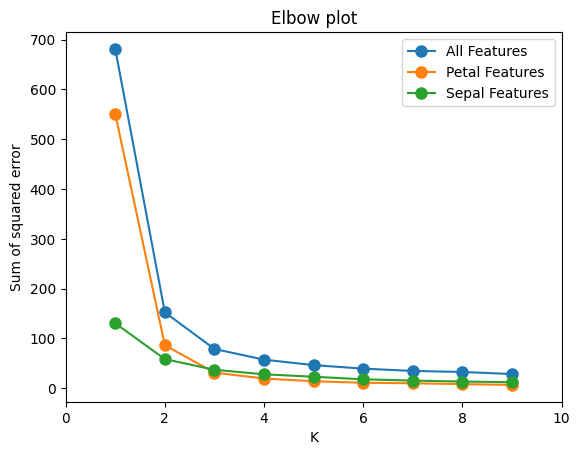

In [ ]:
# Plot sse versus k for all features
plt.plot(k_rng, sse_all, 'o-', markersize=8, label='All Features')

# Plot sse versus k for petal features
plt.plot(k_rng, sse_petal, 'o-', markersize=8, label='Petal Features')

# Plot sse versus k for sepal features
plt.plot(k_rng, sse_sepal, 'o-', markersize=8, label='Sepal Features')

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.xlim(0,10)
plt.legend()
plt.show()

# **Conclusion**


Upon analyzing the elbow plot incorporating the sum of squared errors (SSE) for clustering based on sepal measurements, it becomes evident that the inflection point, indicating the optimal number of clusters, is more pronounced compared to the plots of petal and all features. This distinct curvature suggests that the clustering performance based on sepal features experiences a sharper decline in SSE, leading to a more apparent delineation of clusters. Additionally, the relatively lower SSE values observed for sepal measurements across different numbers of clusters signify tighter and more compact cluster formations, indicative of better-defined groupings. Consequently, clustering using sepal features presents a clearer and more delineated clustering solution, making it a preferable choice for partitioning the Iris dataset into distinct groups. sets.